# CPSC 330 - Applied Machine Learning 

## Homework 7: Clustering and recommender systems
### Associated lectures: Lectures 14 and 15

**Due date: Monday, March 21, 11:59pm**


In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br><br><br>

## Exercise 1: Document clustering toy example <a name="1"></a>
<hr>

In lecture 14, we looked at a popular application of clustering: customer segmentation. In this homework, we will work on a toy example of another popular application: [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A), and clustering is a commonly used technique to organize this data in a meaningful way. 

In this exercise, we will create a toy dataset with sentences from Wikipedia articles and cluster these sentences. 

### 1.1 Sample sentences from Wikipedia articles
rubric={points:2}

The code below extracts first sentences of Wikipedia articles on a set of queries. You will need the `wikipedia` package installed in the course environment to run the code below. 

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```

You also need `nltk` library in the course environment. 

```
conda install -c anaconda nltk 
```        

**Your tasks:**

Run the code below and answer the following question. 

1. Given this dataset, how many clusters would you expect a clustering algorithm to identify? How would you manually label these clusters?   

> *Note 2: Feel free to experiment with queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs when they grade your submission.*


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hiuhongkwan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import wikipedia

queries = [
    "mango_fruit",
    "pastry",
    "Julia language",
    "Python language",
    "hockey",
    "football",
    "supervised learning",
    "unsupervised learning"    
]

wiki_dict = {"wiki query": [], "text": [], "n_words": []}
for i in range(len(queries)):
    sent = sent_tokenize(wikipedia.page(queries[i]).content)[0]
    wiki_dict["text"].append(sent)
    wiki_dict["n_words"].append(len(word_tokenize(sent)))
    wiki_dict["wiki query"].append(queries[i])

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,mango_fruit,"A mango is an edible stone fruit produced by the tropical tree Mangifera indica which is believed to have originated from the region between northwestern Myanmar, Bangladesh, and northeastern India.",33
1,pastry,"Pastry is a dough of flour, water and shortening (solid fats, including butter or lard) that may be savoury or sweetened.",26
2,Julia language,"Julia is a high-level, high-performance, dynamic programming language.",11
3,Python language,"Python is a high-level, general-purpose programming language.",9
4,hockey,"Hockey is a term used to denote various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.",37
5,football,"Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.",22
6,supervised learning,Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.,27
7,unsupervised learning,Unsupervised learning is a type of algorithm that learns patterns from untagged data.,14


I would expect 4 clusters and I would label them as
1. Food: for "mango_fruit" and "pastry"
2. Programming: for "Julia language" and "Python Language"
3. Sport: for "hockey" and "football"
4. ML: for "supervised learning" and "unsupervised learning"

<br><br>

### 1.2 `KMeans` with bag-of-words representation 
rubric={points:4}

We have seen that before we pass text to machine learning models, we need to encode it into a numeric representation. So let's encode our toy dataset above (`wiki_df`) to a numeric representation. 

First, let's try our good old friend: bag-of-words representation. The code below creates dense bag-of-words representation of Wikipedia sentences from 1.1 with [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). 

**Your tasks:**

Run the code below and answer the following questions. 

1. Run `KMeans` clustering on the transformed data (`bow_sents`) with K = the number of clusters you identified in 1.1.  
2. Examine clustering labels assigned by `KMeans`. Is `KMeans` doing a reasonable job in clustering the sentences? 

> You can access cluster label assignments using `labels_` attribute of the clustering object. 

In [4]:
vec = CountVectorizer(stop_words='english')
bow_sents = vec.fit_transform(wiki_df["text"]).todense()
bow_df = pd.DataFrame(
    data=bow_sents, columns=vec.get_feature_names(), index=wiki_df.index
)
bow_df

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,algorithm,ball,bangladesh,based,believed,butter,data,degrees,denote,dough,...,tropical,type,types,unsupervised,untagged,used,various,varying,water,winter
0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0


In [5]:
# adopted from lecture 14
kmeans = KMeans(n_clusters=4)
kmeans.fit(bow_sents)
wiki_df_cl = wiki_df.copy()
wiki_df_cl["cluster"] = kmeans.labels_
wiki_df_cl

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,wiki query,text,n_words,cluster
0,mango_fruit,"A mango is an edible stone fruit produced by the tropical tree Mangifera indica which is believed to have originated from the region between northwestern Myanmar, Bangladesh, and northeastern India.",33,2
1,pastry,"Pastry is a dough of flour, water and shortening (solid fats, including butter or lard) that may be savoury or sweetened.",26,1
2,Julia language,"Julia is a high-level, high-performance, dynamic programming language.",11,1
3,Python language,"Python is a high-level, general-purpose programming language.",9,1
4,hockey,"Hockey is a term used to denote various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.",37,3
5,football,"Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.",22,1
6,supervised learning,Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.,27,0
7,unsupervised learning,Unsupervised learning is a type of algorithm that learns patterns from untagged data.,14,1


Obviously, k-means is not doing a great job in clustering these sentences as we can see that the machine learning cluster is not correctly identified, the sport cluster as well, and the food cluster as well not correctly identified.

<br><br>

### 1.3 Sentence embedding representation
rubric={points:6}

Clustering is sensitive to what kind of representation we use for the given data. 
Bag-of-words representation is limited in that it does not take into account word ordering and context. There are other richer representations of text, and we are going to use one such representation in this exercise. 

The code below creates an alternative and a more expressive representation of sentences. We will call it *sentence embedding representation*. We'll use [sentence transformer](https://www.sbert.net/index.html) to extract these representations. At this point it's enough to know that this is an alternative representation of text which usually works better than simple bag-of-words representation. We will talk a bit more about embedding representations next week. You need to install `sentence-transformers` in the course conda environment to run the code below. 

```
conda activate cpsc330
conda install -c conda-forge sentence-transformers
```

**Your tasks:**

Run the code below and answer the following questions. 

1. How many dimensions (features associated with each example) are present in this representation? 
2. Run `KMeans` clustering with sentence embedding representation of text (`emb_sents`) and examine cluster labels. 
3. How well the sentences are clustered together? 

In [6]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("paraphrase-distilroberta-base-v1")

In [7]:
emb_sents = embedder.encode(wiki_df["text"])
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

Ignored unknown kwarg option direction


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.056666,-0.025778,0.248908,-0.052198,-0.046876,0.202116,0.235076,0.322160,-0.023798,0.133034,...,0.239582,-0.022871,0.071445,0.402666,-0.134781,0.177697,-0.123651,0.446758,0.204768,-0.048541
1,-0.062657,0.214339,-0.025160,0.276731,0.401149,0.030865,-0.089944,0.331922,-0.247056,0.175028,...,0.039294,-0.100197,0.201217,0.257111,0.194594,0.280075,0.037366,0.205146,0.044872,-0.078719
2,0.063674,0.287056,0.098705,0.048766,0.562877,-0.015978,-0.129418,0.098363,0.249305,0.269618,...,0.483838,-0.017338,0.194521,0.185484,0.536236,0.137246,0.368982,-0.028611,-0.017652,-0.192852
3,0.101454,0.046038,0.127588,-0.036343,0.478972,0.132068,-0.035593,0.390519,0.188474,0.348842,...,0.321179,0.367853,0.154809,0.116112,0.101856,0.278487,0.233325,0.111571,0.009258,-0.154422
4,-0.076768,0.098353,0.002281,-0.506420,0.608778,0.077223,0.387065,0.198607,-0.127567,0.250499,...,0.513450,-0.410064,-0.048727,-0.169649,-0.246022,-0.013513,0.007321,0.257681,0.477911,-0.241455
5,-0.071756,0.133156,-0.071762,0.306060,0.358961,-0.061442,0.167584,0.364614,0.323540,0.141398,...,0.404115,0.000236,0.177493,0.016162,0.232335,0.260556,0.168149,0.483963,0.121122,0.196881
6,0.056006,-0.111174,-0.041484,0.279774,0.758024,0.181266,0.128420,0.323363,0.297055,0.154679,...,-0.007967,-0.061345,0.352495,0.011700,-0.358587,-0.052314,0.370847,-0.276011,0.105793,0.175194
7,0.240444,-0.395717,-0.009280,0.217371,0.510592,0.215532,0.100368,-0.008069,0.137967,-0.027900,...,0.223550,-0.093406,-0.088631,0.252510,-0.288174,0.081506,0.261480,-0.533762,0.008995,0.126381


In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(emb_sent_df)
wiki_df["sents_labels"] = kmeans.labels_
wiki_df

,wiki query,text,n_words,sents_labels
0,mango_fruit,"A mango is an edible stone fruit produced by the tropical tree Mangifera indica which is believed to have originated from the region between northwestern Myanmar, Bangladesh, and northeastern India.",33,0
1,pastry,"Pastry is a dough of flour, water and shortening (solid fats, including butter or lard) that may be savoury or sweetened.",26,0
2,Julia language,"Julia is a high-level, high-performance, dynamic programming language.",11,2
3,Python language,"Python is a high-level, general-purpose programming language.",9,2
4,hockey,"Hockey is a term used to denote various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.",37,3
5,football,"Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.",22,3
6,supervised learning,Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.,27,1
7,unsupervised learning,Unsupervised learning is a type of algorithm that learns patterns from untagged data.,14,1


In [9]:
emb_sent_df.mean(axis=1)

0    0.012495
1    0.013978
2    0.013575
3    0.013238
4    0.012747
5    0.010534
6    0.019579
7    0.018185
dtype: float32

1. 768
3. Surprisingly good, all clusters are being correctly identified (which are the same as that in Q1.1)

### 1.4 DBSCAN with cosine distance  
rubric={points:8}

Let's try `DBSCAN` on our toy dataset. K-Means is kind of bound to the Euclidean distance because it is based on the notion of means. With `DBSCAN` we can try different distance metrics. In the context of text (sparse data), [cosine similarities](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) or cosine distances tend to work better. Given vectors $u$ and $v$, the **cosine distance** between the vectors is defined as: 

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

In this exercise, you'll use DBSCAN with cosine distances. 

**Your tasks**

1. Use DBSCAN to cluster our toy data using sentence embedding representation (`emb_sents`) and `metric='cosine'`. 
2. Briefly comment on the number of clusters identified and the cluster assignment given by the algorithm.

> *Note: You will also have to set appropriate values for the hyperparamters `eps` and `min_samples` to get meaningful clusters, as default values for these hyperparameters won't work on this toy dataset. In order to set appropriate value for `eps`, you may want to examine the distances given by [sklearn's `cosine_distance`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_distances.html).*

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.65, min_samples = 1, metric='cosine')
dbscan.fit(emb_sents)
wiki_df["dbscan_labels"] = dbscan.labels_
wiki_df

,wiki query,text,n_words,sents_labels,dbscan_labels
0,mango_fruit,"A mango is an edible stone fruit produced by the tropical tree Mangifera indica which is believed to have originated from the region between northwestern Myanmar, Bangladesh, and northeastern India.",33,0,0
1,pastry,"Pastry is a dough of flour, water and shortening (solid fats, including butter or lard) that may be savoury or sweetened.",26,0,1
2,Julia language,"Julia is a high-level, high-performance, dynamic programming language.",11,2,2
3,Python language,"Python is a high-level, general-purpose programming language.",9,2,2
4,hockey,"Hockey is a term used to denote various types of both summer and winter team sports which originated on either an outdoor field, sheet of ice, or dry floor such as in a gymnasium.",37,3,3
5,football,"Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal.",22,3,3
6,supervised learning,Supervised learning (SL) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs.,27,1,4
7,unsupervised learning,Unsupervised learning is a type of algorithm that learns patterns from untagged data.,14,1,4


2. There are 5 clusters being identified by dbscan, which is very close to the results of kmeans. However, for mango and pastry, it is not able to cluster them together.

<br><br>

### 1.5 Visualizing clusters 
rubric={points:5}

One thing we could do with unlabeled data is visualizing it. That said, our data is high dimensional (each example is represented with 768 dimensions) and high-dimensional data is hard to visualize. One way to visualize high-dimensional data is applying dimensionality reduction to get the most important (2 or 3) components of the dataset and visualizing this low-dimensional data. 

Given data as a `numpy` array and cluster assignments, the `plot_pca_clusters` function below transforms the given data by applying dimensionality reduction and plots the transformed data into corresponding clusters. 

> *Note: At this point we are using this function only for visualization and you are not expected to understand the PCA part. Feel free to modify the function as you see fit.*

**Your tasks:**

1. Call the function `plot_pca_clusters` to visualize the clusters created by the three models above:
    - KMeans with bag-of-words representation 
    - KMeans with sentence embedding representation 
    - DBSCAN with sentence embedding representation 

In [11]:
from sklearn.decomposition import PCA # Obtain the principal components

def plot_pca_clusters(
    data,
    cluster_labels,
    raw_sents=wiki_df["text"],
    show_labels=False,
    size=100,
    title="PCA visualization",
):
    """
    Carry out dimensionality reduction using PCA and plot 2-dimensional clusters.

    Parameters
    -----------
    data : numpy array
        data as a numpy array
    cluster_labels : list
        cluster labels for each row in the dataset
    raw_sents : list
        the original raw sentences for labeling datapoints
    show_labels : boolean
        whether you want to show labels for points or not (default: False)
    size : int
        size of points in the scatterplot
    title : str
        title for the visualization plot

    Returns
    -----------
    None. Shows the clusters.
    """

    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
    pca_df["cluster"] = cluster_labels

    plt.figure(figsize=(10, 7))
    plt.title(title)
    ax = sns.scatterplot(
        x="pca1", y="pca2", hue="cluster", data=pca_df, palette="tab10", s=size
    )

    x = pca_df["pca1"].tolist()
    y = pca_df["pca2"].tolist()
    if show_labels:
        for i, txt in enumerate(raw_sents):
            plt.annotate(" ".join(txt.split()[:10]), (x[i], y[i]))
        ax.legend(loc="upper right")

    plt.show()

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


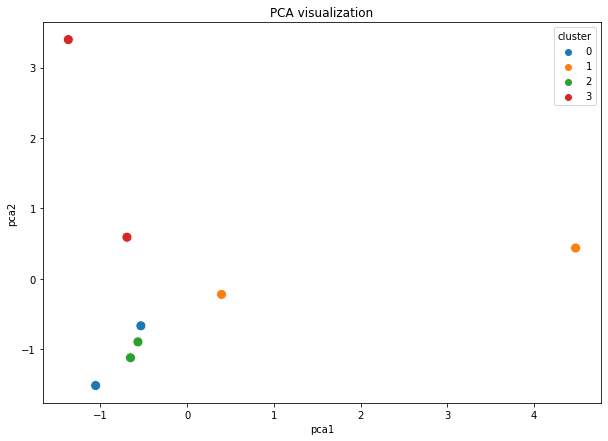

In [12]:
plot_pca_clusters(bow_sents, kmeans.labels_)

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


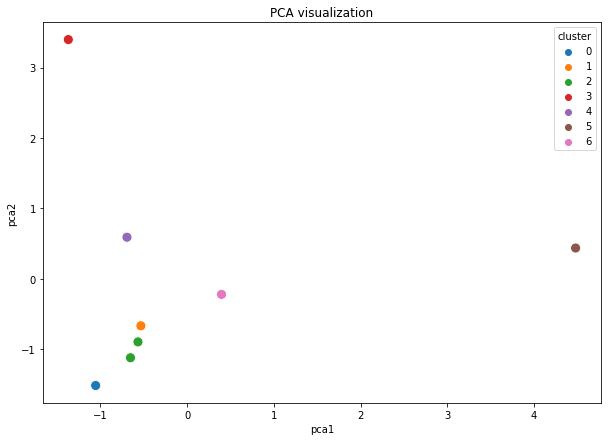

In [13]:
dbscan2 = DBSCAN(eps=0.65, min_samples = 1, metric='cosine')
dbscan2.fit(bow_sents)
plot_pca_clusters(bow_sents, dbscan2.labels_)

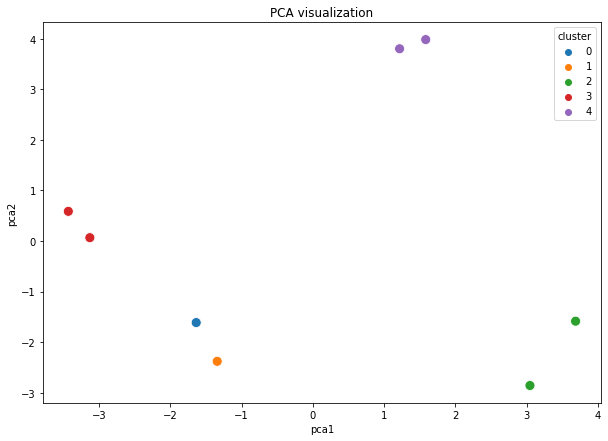

In [14]:
plot_pca_clusters(emb_sents, dbscan.labels_)

<br><br><br><br>

## Exercise 2: Movie recommendations
<hr>

Let's build simple movie recommendation systems using the [MovieLens dataset](https://www.kaggle.com/prajitdatta/movielens-100k-dataset/data). The original source of the data is [here](https://grouplens.org/datasets/movielens/), and the structure of the data is described in the [README](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) that comes with it. The code below reads the data as a CSV assuming that it's under `data/ml-100k/` directory under your lab folder. 

In [15]:
r_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv(
    os.path.join("data", "ml-100k", "u.data"),
    sep="\t",
    names=r_cols,
    encoding="latin-1",
)
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [16]:
# We'll be using these keys later in the starter code
user_key = "user_id"
item_key = "movie_id"

### 2.1 Terminology
rubric={points:3}

Here is some notation we will be using in this homework. 

**Constants**:

 - $N$: the number of users, indexed by $n$
 - $M$: the number of movies, indexed by $m$
 - $\mathcal{R}$: the set of indices $(n,m)$ where we have ratings in the utility matrix $Y$
    - Thus $|\mathcal{R}|$ is the total number of ratings
 
**The data**:

 - $Y$: the utility matrix containing ratings, with a lot of missing entries
 - `train_mat` and `valid_mat`: Utility matrices for train and validation sets, respectively
 
    
**Your tasks:**    

1. What are the values of $N$ and $M$ in movie ratings data?  
2. What would be the shape of the dense utility matrix $Y$? 
3. What would be the fraction of non missing ratings in the utility matrix $Y$? 

In [17]:
# adopted from lecture 15
N = len(np.unique(ratings['user_id']))
M = len(np.unique(ratings['movie_id']))
print(f"N is {N}, M is {M}")

N is 943, M is 1682


In [18]:
user_mapper = dict(zip(np.unique(ratings['user_id']), list(range(N))))
item_mapper = dict(zip(np.unique(ratings['movie_id']), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(ratings['user_id'])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(ratings['movie_id'])))


def create_Y_from_ratings(data, N, M):
    Y = np.zeros((N, M))
    Y.fill(np.nan)
    for index, val in data.iterrows():
        n = user_mapper[val['user_id']]
        m = item_mapper[val['movie_id']]
        Y[n, m] = val["rating"]

    return Y


Y_mat = create_Y_from_ratings(ratings, N, M)
Y_mat.shape

(943, 1682)

In [19]:
print("Fraction non-nan ratings: %0.3f" % (len(ratings) / (N * M)))

Fraction non-nan ratings: 0.063


1. N is 943, and M is 1682
2. the dense utility matrix has 943 rows and 1682 columns
3. 0.063

<br><br>

### 2.2 Splitting the data
rubric={points:5}

**Your tasks:**

1. Split the ratings data with `test_size=0.2` and `random_state=42`. 

In [20]:
from sklearn.model_selection import train_test_split
ratings = ratings.drop(columns=["timestamp"])
X = ratings.copy()
y = ratings['user_id']
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_valid.shape

((80000, 3), (20000, 3))

<br><br>

### 2.3 Utility matrix 
rubric={points:10}

**Your tasks**
1. Create utility matrices for train and validation sets (similar to how we did in the class). 
2. Briefly explain the difference between the train and validation utility matrices. 

> You may use the code from lecture notes with appropriate attributions.  

> You won't do it in real life but since our dataset is not that big, create a dense utility matrix in this assignment. You are welcome to try sparse matrix but then you may have to change some started code provided in the later exercises.  

In [21]:
user_mapper = dict(zip(np.unique(ratings[user_key]), list(range(N))))
item_mapper = dict(zip(np.unique(ratings[item_key]), list(range(M))))
user_inverse_mapper = dict(zip(list(range(N)), np.unique(ratings[user_key])))
item_inverse_mapper = dict(zip(list(range(M)), np.unique(ratings[item_key])))

In [22]:
train_mat = create_Y_from_ratings(X_train, N, M)
valid_mat = create_Y_from_ratings(X_valid, N, M)

In [23]:
pd.DataFrame(train_mat)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,NaN,3.0,4.0,NaN,3.0,NaN,4.0,NaN,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pd.DataFrame(valid_mat)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,NaN,NaN,3.0,NaN,5.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The train_mat and valid_mat have the same rows and columns because it's restricted by N and M. While they are originated from different source, e.g. the train_mat used data from the training data and the valid_mat used data from the validation data. Technically we should have more nan in the validation matrix because the size of validation data is lesser.

<br><br>

### 2.4 Evaluation and baseline
rubric={points:4}

To compare different models you build in this homework, let's write a couple of functions for evaluation. 
- The `error` function returns RMSE.
- The `evaluate` function prints the train and validation RMSEs. 

**Your task:**

1. Briefly explain what exactly we are comparing to evaluate recommender systems. 
2. Implement the global average baseline, where you predict everything as the global average rating. What's the RMSE of the global average baseline?

In [25]:
# adopted from lecture 15
def error(Y1, Y2):
    """
    Returns the root mean squared error (RMSE).
    """
    return np.sqrt(np.nanmean((Y1 - Y2) ** 2))


def evaluate(pred_Y, train_mat, valid_mat, model_name="Global average"):
    print("%s train RMSE: %0.2f" % (model_name, error(pred_Y, train_mat)))
    print("%s valid RMSE: %0.2f" % (model_name, error(pred_Y, valid_mat)))
    
avg = np.nanmean(train_mat)
pred_g = np.zeros(train_mat.shape) + avg
evaluate(pred_g, train_mat, valid_mat, model_name="Global average")

Global average train RMSE: 1.13
Global average valid RMSE: 1.12


1. We are comparing the RMSE (Root mean squared errors) which is the square root of the average sum of the squared difference between the predicted matrix and the original utility matrix - the higher the RMSE and worse the model.
2. As seen above, the RMSE is 1.13 and 1.12 for train and valid matrix.

<br><br>

### (Optional) 2.5 $k$-nearest neighbours imputation
rubric={points:1}

**Your tasks:**

Try [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to fill in the missing entries. Discuss your observations. 

In [26]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
train_mat_imp = imputer.fit_transform(train_mat)

In [27]:
pd.DataFrame(train_mat_imp)

,0,1,2,3,4,5,6,7,8,9,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652
0,4.0,3.0,4.0,3.7,3.0,3.8,4.0,3.3,5.0,3.0,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
1,4.0,3.0,3.3,4.1,3.2,4.3,4.4,4.4,4.5,4.1,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
2,3.8,3.2,2.8,3.1,3.5,3.5,4.0,3.7,3.7,4.3,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
3,4.1,2.9,3.9,3.1,3.6,3.8,3.3,4.3,4.2,4.2,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
4,4.0,3.0,3.3,3.8,3.3,4.1,4.0,3.8,3.8,4.1,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.8,3.7,3.7,3.5,4.0,4.1,4.0,3.9,5.0,4.3,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
939,4.1,3.2,3.6,2.0,3.3,3.6,3.7,4.1,3.0,4.3,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
940,5.0,3.4,2.9,3.8,3.3,3.6,4.3,3.8,4.5,3.6,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0
941,4.2,3.4,3.6,3.4,4.0,4.0,3.5,4.3,4.0,4.0,...,3.0,3.0,1.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0


In [28]:
train_mat.shape

(943, 1682)

It seems that after running KNNImputer, the number of features got reduced from 1682 to 1653.

<br><br>

### 2.6 Use collaborative filtering with the `surprise` package
rubric={points:6}

Use the [`surprise`](https://surprise.readthedocs.io/en/stable/) package which has implementation of SVD algorithm for collaborative filtering. You can install it as follows in your conda environment. 

```
>> conda activate cpsc330
>> conda install -c conda-forge scikit-surprise
or 
>> pip install scikit-surprise
```

**Your tasks:**

1. Carry out cross-validation using SVD algorithm in the package, similar to how we did it in the lecture on Jester dataset. Report mean RMSE and compare it with global baseline. 

In [29]:
import surprise
from surprise import SVD, Dataset, Reader, accuracy

reader = Reader()
data = Dataset.load_from_df(ratings, reader)  # Load the data

trainset, validset = surprise.model_selection.train_test_split(
    data, test_size=0.2, random_state=42
)  
k = 10
algo = SVD(n_factors=k, random_state=42)
algo.fit(trainset)
svd_preds = algo.test(validset)
accuracy.rmse(svd_preds, verbose=True)

RMSE: 0.9328


0.932839700199596

In [30]:
from surprise.model_selection import cross_validate

results = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)
pd.DataFrame(results).mean()

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9363  0.9364  0.9390  0.9344  0.9408  0.9374  0.0022  
MAE (testset)     0.7367  0.7400  0.7437  0.7396  0.7423  0.7405  0.0024  
Fit time          1.58    1.31    1.30    1.33    1.57    1.42    0.13    
Test time         0.10    0.19    0.08    0.11    0.10    0.12    0.04    


test_rmse    0.937385
test_mae     0.740465
fit_time     1.418434
test_time    0.118554
dtype: float64

Implementing CV using SVD we can get a valid rmse of 0.939406, which is lower than the baseline model which has a 1.12 rmse for valid matrix. We have a better result!

<br><br><br><br>

## Exercise 3: Short answer questions
<hr>

rubric={points:5}

Answer the following short-answer questions: 

1. What's the main difference between unsupervised and supervised learning?
2. When choosing $k$ in K-Means, why not just choose the $k$ that leads to the smallest inertia (sum of squared distances within clusters)?
3. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with $k$-means?
4. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with DBSCAN?
5. How might you apply clustering to recommendation systems? 

1. For supervised learning, you train a model with input data and their corresponding targets. However, for unsupervised learning, we do have the so-called targets in our training (a.k.a no supervision) and we let the models to find patterns for ourselves.
2. Because that does not make any sense, if we have 10 points and let k = 10, then every point is a cluster and has inertia of 0. But that does not help us in finding a meaningful pattern.
3. This is not possible with k-means, as k-means will put every single point, including the outliers, to the closest cluster. In that case, we are not able to spot it out unless we visualize it (but typically high dimensional data is hard to be visualized). Or you sort the top 10 points that have the largest distance away from their cluster's centroid and then classify these 10 as outliers. But still technically you need to have some more work to do.
4. For DBSCAN, points that are not in any cluster could be considered as outliers. For DBSCAN, not every single point belong to a certain cluster.
5. We can apply k-means clustering to recommendation systems. The basic idea is to impute the missing values in the utility matrix using the average of k-nearest neighbours in the training set.

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 